# **Projeto Final: Introdução à Ciência de Dados**

### Alunos:
  - Davi Henrique Menezes da Cruz
  - Sabrina de Oliveira Souza

### Subproblema:
Diferenças reginais e Perfil Demográfico

### Objetivo:
Analisar a distribuição e a prevalência de casos de SRAG considerando as variáveis
de Sexo e Raça/Cor em diferentes UFs do Brasil, no período de 2013 a 2018.

### Variáveis:
- Município de Registro do caso
- Data dos primeiros sintomas 
- Sexo
- Raça/Cor
- UF
- Município de residência 
- Distrito

In [44]:
# importação das bibliotecas

import pandas as pd
import numpy as np
# biblioteca de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
#bases
df1 = pd.read_csv("./INFLUD16.csv", sep=';', on_bad_lines="skip", encoding="latin1", low_memory=False)
df2 = pd.read_csv("./INFLUD17.csv", sep=';', on_bad_lines="skip", encoding="latin1", low_memory=False)
df3 = pd.read_csv("./INFLUD18.csv", sep=';', on_bad_lines="skip", encoding="latin1", low_memory=False)


#### Parte 1

In [46]:
# nomes das variáveis nas bases
variaveis = {
    "municipio_registro": ["ID_MUNICIP"],
    "data_primeiros_sintomas": ["DT_SIN_PRI"],
    "sexo": ["CS_SEXO"],
    "raca_cor": ["CS_RACA"],
    "uf": ["SG_UF"],
    "municipio_residencia": ["ID_MN_RESI"],
    "distrito": ["ID_DISTRIT"],
}

# procura, para cada variável lógica, a primeira coluna existente no DataFrame
# no novo DataFrame só terão as colunas relevantes para o trabalho (as escolhidas)
def selecionar_colunas(df, mapa):
    # cria um dicionário vazio chamado "cols" pra armazenar as colunas que vão ser selecionadas
    cols = {}
    for nome_logico, opcoes in mapa.items():
        for coluna in opcoes:
            if coluna in df.columns:
                cols[nome_logico] = df[coluna]
                break
    return pd.DataFrame(cols)

# cria DataFrames com as variáveis selecionadas
df1_sel = selecionar_colunas(df1, variaveis)
df2_sel = selecionar_colunas(df2, variaveis)
df3_sel = selecionar_colunas(df3, variaveis)

# mostra a porcentagem de valores ausentes em cada coluna
def analisar_na(df, nome):
    print(f"\nValores ausentes: {nome}")
    print((df.isna().mean() * 100).round(2))

# mostra tipos de dados (dtypes) das colunas
def analisar_tipos(df, nome):
    print(f"\nTipos de dados: {nome}")
    print(df.dtypes)

# mostra a contagem de valores únicos para uma coluna (para encontrar inconsistências)
def mostrar_valores_unicos(df, coluna, nome_df):
    print(f"\nValores únicos da coluna '{coluna}' em {nome_df}")
    print(df[coluna].value_counts(dropna=False))

# verificar se a UF está dentro das siglas do Brasil
def checar_uf(df, nome_df):
    ufs_validas = {
        "AC","AL","AP","AM","BA","CE","DF","ES","GO","MA","MT","MS","MG",
        "PA","PB","PR","PE","PI","RJ","RN","RS","RO","RR","SC","SP","SE","TO"
    }
    if "uf" in df.columns:
        invalidas = df.loc[~df["uf"].isin(ufs_validas), "uf"].unique()
        print(f"\n--- UF inválidas em {nome_df}: {invalidas if len(invalidas) > 0 else 'Nenhuma'}")
    else:
        print(f"\n--- Coluna 'uf' não encontrada em {nome_df}")

#ANÁLISE

# analisa valores faltantes
analisar_na(df1_sel, "Base 2016")
analisar_na(df2_sel, "Base 2017")
analisar_na(df3_sel, "Base 2018")

# analisa tipos de dados
analisar_tipos(df1_sel, "Base 2016")
analisar_tipos(df2_sel, "Base 2017")
analisar_tipos(df3_sel, "Base 2018")

# mostra valores únicos para 'sexo' (exemplo de inconsistência)
mostrar_valores_unicos(df1_sel, "sexo", "Base 2016")
mostrar_valores_unicos(df2_sel, "sexo", "Base 2017")
mostrar_valores_unicos(df3_sel, "sexo", "Base 2018")

# mostra valores únicos para 'raca_cor' (outro exemplo)
mostrar_valores_unicos(df1_sel, "raca_cor", "Base 2016")

# verifica se a UF tem valores inválidos
checar_uf(df1_sel, "Base 2016")
checar_uf(df2_sel, "Base 2017")
checar_uf(df3_sel, "Base 2018")


Valores ausentes: Base 2016
municipio_registro         0.00
data_primeiros_sintomas    0.00
sexo                       0.00
raca_cor                   3.65
uf                         0.00
municipio_residencia       0.00
dtype: float64

Valores ausentes: Base 2017
municipio_registro         0.00
data_primeiros_sintomas    0.00
sexo                       0.00
raca_cor                   2.65
uf                         0.00
municipio_residencia       0.00
dtype: float64

Valores ausentes: Base 2018
municipio_registro         0.00
data_primeiros_sintomas    0.00
sexo                       0.00
raca_cor                   2.74
uf                         0.00
municipio_residencia       0.00
dtype: float64

Tipos de dados: Base 2016
municipio_registro           int64
data_primeiros_sintomas     object
sexo                        object
raca_cor                   float64
uf                           int64
municipio_residencia         int64
dtype: object

Tipos de dados: Base 2017
municipio_regi

#### Parte 2

        ANÁLISE: 2016        
-------------------------------

   - Nulos tratados. Tamanho final do DF: 54380 linhas.

   - Contagem e porcentagem da coluna 'sexo':
          Contagem  Porcentagem
sexo                           
F            27649        50.84
M            26717        49.13
IGNORADO        14         0.03

   - Contagem e porcentagem da coluna 'raca_cor':
          Contagem  Porcentagem
raca_cor                       
1.0          30578        56.23
4.0          11374        20.92
9.0           7518        13.82
2.0           2181         4.01
IGNORADO      1985         3.65

   - Contagem e porcentagem da coluna 'uf':
    Contagem  Porcentagem
uf                       
35     20939        38.50
41      6603        12.14
43      5631        10.35
31      4974         9.15
42      2792         5.13


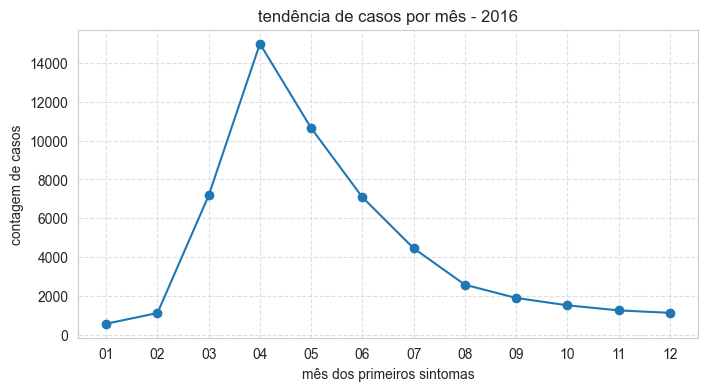

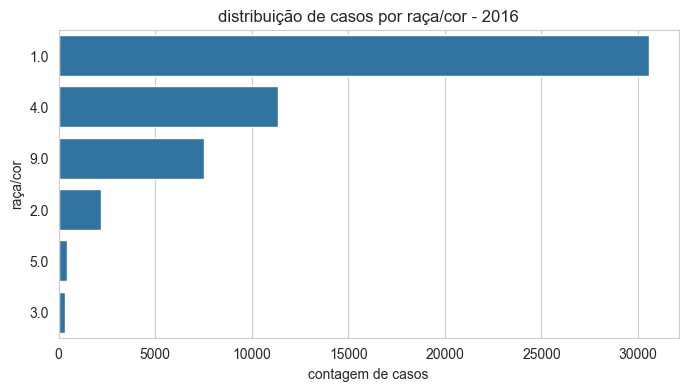

        ANÁLISE: 2017        
-------------------------------

   - Nulos tratados. Tamanho final do DF: 29551 linhas.

   - Contagem e porcentagem da coluna 'sexo':
          Contagem  Porcentagem
sexo                           
M            15061        50.97
F            14482        49.01
IGNORADO         8         0.03

   - Contagem e porcentagem da coluna 'raca_cor':
          Contagem  Porcentagem
raca_cor                       
1.0          15444        52.26
4.0           7882        26.67
9.0           3911        13.23
2.0           1133         3.83
IGNORADO       782         2.65

   - Contagem e porcentagem da coluna 'uf':
    Contagem  Porcentagem
uf                       
35      8295        28.07
41      4428        14.98
43      3185        10.78
31      3098        10.48
26      1833         6.20


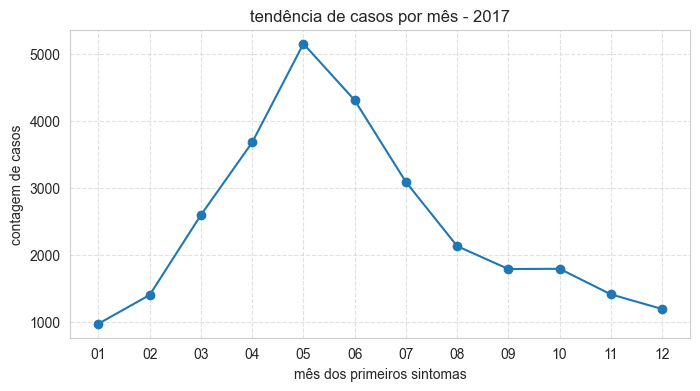

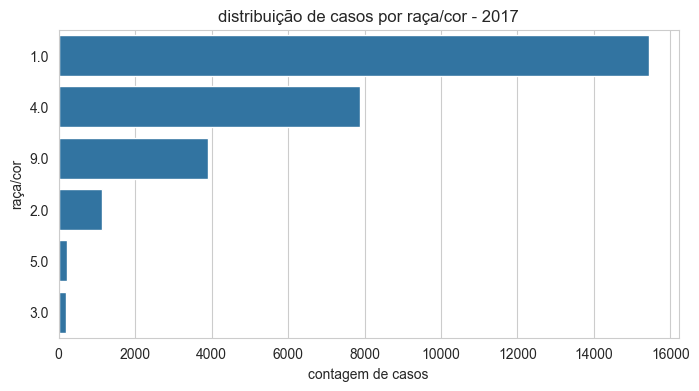

        ANÁLISE: 2018        
-------------------------------

   - Nulos tratados. Tamanho final do DF: 47756 linhas.

   - Contagem e porcentagem da coluna 'sexo':
          Contagem  Porcentagem
sexo                           
M            24397        51.09
F            23351        48.90
IGNORADO         8         0.02

   - Contagem e porcentagem da coluna 'raca_cor':
          Contagem  Porcentagem
raca_cor                       
1.0          24003        50.26
4.0          14258        29.86
9.0           5767        12.08
2.0           1851         3.88
IGNORADO      1310         2.74

   - Contagem e porcentagem da coluna 'uf':
    Contagem  Porcentagem
uf                       
35     14880        31.16
41      6754        14.14
43      3734         7.82
31      3123         6.54
42      2303         4.82


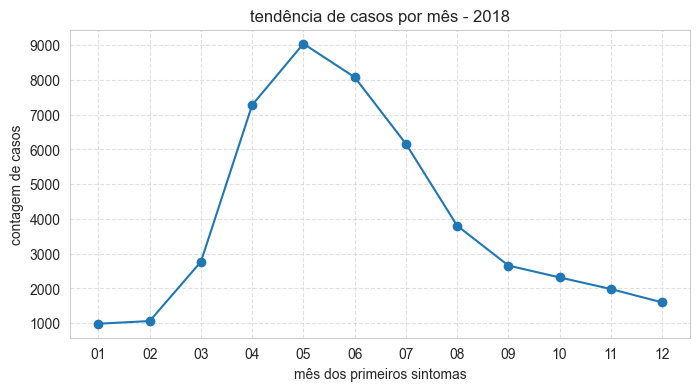

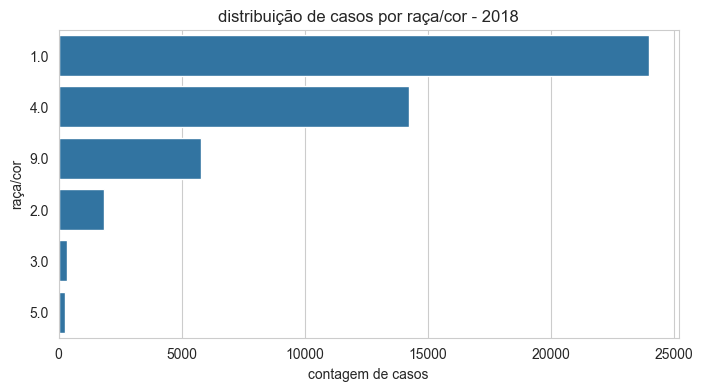

In [47]:
# configurações globais
sns.set_style("whitegrid")
#tamanho do gráfico
plt.rcParams['figure.figsize'] = (8, 4)

def analise_completa_srag(df, ano_label):
    print(f"        ANÁLISE: {ano_label}        ")
    print(f"-------------------------------\n")
    
    df_analise = df.copy()

    # padronização de tipos (Data)
    if 'data_primeiros_sintomas' in df_analise.columns:
        df_analise['data_primeiros_sintomas'] = pd.to_datetime(
            df_analise['data_primeiros_sintomas'], 
            format='%d/%m/%Y',
            errors='coerce'
        )

    # padronização e inconsistências (Strings)
    for col in ['sexo', 'raca_cor', 'uf']:
        if col in df_analise.columns:
            # garante que seja string e tira os espaços
            df_analise[col] = df_analise[col].astype(str).str.strip().str.upper()
            
            # trata código em branco como nulo (NaN)
            if col == 'sexo':
                df_analise.loc[df_analise['sexo'].isin(['I', 'E', 'NAN']), 'sexo'] = np.nan
            if col == 'raca_cor':
                df_analise.loc[df_analise['raca_cor'].isin(['9', 'NAN']), 'raca_cor'] = np.nan

    # remove nulos e escreve "IGNORADO"    
    colunas_categoricas = [c for c in ['sexo', 'raca_cor', 'uf'] if c in df_analise.columns]
    for col in colunas_categoricas:
        df_analise[col] = df_analise[col].fillna('IGNORADO')
        
    # tira as linhas onde a data é nula
    df_analise.dropna(subset=['data_primeiros_sintomas'], inplace=True)
    print(f"   - Nulos tratados. Tamanho final do DF: {len(df_analise)} linhas.")
    
    # acrescenta a coluna do mes para as estatísticas
    if 'data_primeiros_sintomas' in df_analise.columns:
        df_analise['mes'] = df_analise['data_primeiros_sintomas'].dt.month
    
    # estatísticas
    for col in colunas_categoricas:
        print(f"\n   - Contagem e porcentagem da coluna '{col}':")
        contagem = df_analise[col].value_counts(dropna=False)
        percentual = (df_analise[col].value_counts(normalize=True) * 100).round(2)
        
        estatisticas = pd.DataFrame({'Contagem': contagem, 'Porcentagem': percentual})
        #mostra só 5
        print(estatisticas.head(5))

    # gráfico de linhas: casos ao longo do tempo
    if 'mes' in df_analise.columns:
        plt.figure(figsize=(8, 4))
        casos_por_mes = df_analise.groupby('mes').size() 
        casos_por_mes.plot(kind='line', marker='o')
        
        plt.title(f'tendência de casos por mês - {ano_label}')
        plt.xlabel('mês dos primeiros sintomas')
        plt.ylabel('contagem de casos')
        plt.xticks(range(1, 13), labels=[f'{m:02d}' for m in range(1, 13)])
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    # histograma: distribuição por raça/cor
    if 'raca_cor' in df_analise.columns:
        plt.figure(figsize=(8, 4))
        # apaga 'IGNORADO' para ver a distribuição
        data_plot = df_analise[df_analise['raca_cor'] != 'IGNORADO']
        
        sns.countplot(
            y='raca_cor', 
            data=data_plot, 
            order=data_plot['raca_cor'].value_counts().index,
        )
        
        plt.title(f'distribuição de casos por raça/cor - {ano_label}')
        plt.xlabel('contagem de casos')
        plt.ylabel('raça/cor')
        plt.show()

    return df_analise

# análise ano a ano
df1_tratado = analise_completa_srag(df1_sel, "2016")
df2_tratado = analise_completa_srag(df2_sel, "2017")
df3_tratado = analise_completa_srag(df3_sel, "2018")

### Parte 3

In [48]:
# MODELAGEM COMPLETA
# ------------------

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# cópias das bases tratadas para não mudar os dataframes anteriores
df1_model = df1_tratado.copy()
df2_model = df2_tratado.copy()
df3_model = df3_tratado.copy()

# 1) adicionar coluna do ano
df1_model["ano"] = 2016
df2_model["ano"] = 2017
df3_model["ano"] = 2018

# 2) unir todas as bases
df_all = pd.concat([df1_model, df2_model, df3_model], ignore_index=True)
print("Tamanho do conjunto unificado:", df_all.shape)

# 3) criar variável de região a partir da UF
map_regiao = {
    "RO": "N", "AC": "N", "AM": "N", "RR": "N", "PA": "N", "AP": "N", "TO": "N",
    "MA": "NE", "PI": "NE", "CE": "NE", "RN": "NE", "PB": "NE", "PE": "NE",
    "AL": "NE", "SE": "NE", "BA": "NE",
    "MG": "SE", "ES": "SE", "RJ": "SE", "SP": "SE",
    "PR": "S", "SC": "S", "RS": "S",
    "MS": "CO", "MT": "CO", "GO": "CO", "DF": "CO"
}
df_all["regiao"] = df_all["uf"].map(map_regiao)

# 4) criar variável de mês a partir da data dos primeiros sintomas (se ainda não existir)
if "mes" not in df_all.columns:
    df_all["mes"] = df_all["data_primeiros_sintomas"].dt.month

# 5) CRIAÇÃO DA VARIÁVEL ALVO
# ---------------------------

# converter raça/cor para numérico, tratando erros como NaN
df_all["raca_cor"] = pd.to_numeric(df_all["raca_cor"], errors="coerce")

# grupo não-branco
grupo_nao_branco = [2, 4, 5]  # pretos, pardos e indígenas

# criação da variável alvo binária: 1 = não-branco, 0 = branco
df_all["nao_branco"] = np.where(
    df_all["raca_cor"].isin(grupo_nao_branco), 1,
    np.where(df_all["raca_cor"] == 1, 0, np.nan)
)

# 6) filtrar registros com sexo definido (M/F) e alvo válido
df_modelo = df_all[
    df_all["sexo"].isin(["M", "F"])
].dropna(subset=["nao_branco"]).copy()

print("Tamanho do conjunto após filtragem:", df_modelo.shape)
print("\nDistribuição da variável alvo (nao_branco):")
print(df_modelo["nao_branco"].value_counts(normalize=True).round(3))

df_modelo[["raca_cor", "nao_branco", "sexo", "uf", "regiao", "ano", "mes"]].head()

# 7) SELEÇÃO DE FEATURES
# ----------------------

# categóricas → dummies
cols_cat = ["sexo", "regiao"]

# numéricas
cols_num = ["ano", "mes"]

X_cat = pd.get_dummies(df_modelo[cols_cat], drop_first=True)
X_num = df_modelo[cols_num]

# combinar features
X = pd.concat([X_cat, X_num], axis=1)
y = df_modelo["nao_branco"]

# 8) DIVISÃO TREINO / TESTE (70/30)
# ---------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Tamanhos (train/test):", X_train.shape, X_test.shape)

# 9) TREINAMENTO DO MODELO (Regressão Logística)
# ----------------------------------------------

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# 10) AVALIAÇÃO
# -------------

y_pred = log_reg.predict(X_test)

print("\n--- Relatório de classificação (Classe positiva = 1 = não branco) ---\n")
print(classification_report(y_test, y_pred))

print("\n--- Matriz de confusão ---\n")
print(confusion_matrix(y_test, y_pred))


Tamanho do conjunto unificado: (131687, 8)
Tamanho do conjunto após filtragem: (109572, 10)

Distribuição da variável alvo (nao_branco):
nao_branco
0.0    0.639
1.0    0.361
Name: proportion, dtype: float64
Tamanhos (train/test): (76700, 3) (32872, 3)

--- Relatório de classificação (Classe positiva = 1 = não branco) ---

              precision    recall  f1-score   support

         0.0       0.64      0.56      0.60     21006
         1.0       0.37      0.46      0.41     11866

    accuracy                           0.52     32872
   macro avg       0.51      0.51      0.50     32872
weighted avg       0.54      0.52      0.53     32872


--- Matriz de confusão ---

[[11674  9332]
 [ 6435  5431]]


In [49]:
import numpy as np
import pandas as pd

# cópias das bases tratadas para não alterar os dataframes anteriores
df1_model = df1_tratado.copy()
df2_model = df2_tratado.copy()
df3_model = df3_tratado.copy()

# 1) adicionar coluna do ano em cada base
df1_model["ano"] = 2016
df2_model["ano"] = 2017
df3_model["ano"] = 2018

# 2) unir todas as bases em um único DataFrame
df_all = pd.concat([df1_model, df2_model, df3_model], ignore_index=True)
print("Tamanho do conjunto unificado:", df_all.shape)

df_all.head()

Tamanho do conjunto unificado: (131687, 8)


,municipio_registro,data_primeiros_sintomas,sexo,raca_cor,uf,municipio_residencia,mes,ano
0,110020,2016-06-25,M,5.0,11,110001,6,2016
1,110004,2016-05-13,F,1.0,11,110001,5,2016
2,110004,2016-05-25,M,1.0,11,110001,5,2016
3,110002,2016-05-01,M,4.0,11,110002,5,2016
4,110002,2016-05-04,F,1.0,11,110002,5,2016


In [50]:
# 3) criar variável de região a partir da UF
map_regiao = {
    "RO": "N", "AC": "N", "AM": "N", "RR": "N", "PA": "N", "AP": "N", "TO": "N",
    "MA": "NE", "PI": "NE", "CE": "NE", "RN": "NE", "PB": "NE", "PE": "NE",
    "AL": "NE", "SE": "NE", "BA": "NE",
    "MG": "SE", "ES": "SE", "RJ": "SE", "SP": "SE",
    "PR": "S", "SC": "S", "RS": "S",
    "MS": "CO", "MT": "CO", "GO": "CO", "DF": "CO"
}

df_all["regiao"] = df_all["uf"].map(map_regiao)

# 4) criar variável de mês a partir da data dos primeiros sintomas (se ainda não existir)
if "mes" not in df_all.columns:
    df_all["mes"] = df_all["data_primeiros_sintomas"].dt.month

# PADRONIZAR AS COLUNAS "sexo" e "raca_cor"
df_all["sexo"] = df_all["sexo"].astype(str).str.strip().str.upper()
df_all["raca_cor"] = pd.to_numeric(df_all["raca_cor"], errors='coerce')

# 5) criar variável-alvo binária baseada em raça/cor
# código típico SRAG: 1 Branca, 2 Preta, 3 Amarela, 4 Parda, 5 Indígena, 9 Ignorado

grupo_nao_branco = [2.0, 4.0, 5.0]  # Preta, Parda, Indígena

def classifica_nao_branco(x):
    if x in grupo_nao_branco:
        return 1
    elif x == 1.0:  # Branca
        return 0
    else:
        return np.nan  # ignorado / não informado

df_all["nao_branco"] = df_all["raca_cor"].apply(classifica_nao_branco)

# 6) filtrar registros com sexo definido (M/F) e raça/cor válida
df_modelo = df_all[
    df_all["sexo"].isin(["M", "F"])
].dropna(subset=["nao_branco"]).copy()

print("Tamanho do conjunto após filtragem:", df_modelo.shape)
print("\nDistribuição da variável alvo (nao_branco):")
print(df_modelo["nao_branco"].value_counts(normalize=True).round(3))

df_modelo[["raca_cor", "nao_branco", "sexo", "uf", "regiao", "ano", "mes"]].head()


Tamanho do conjunto após filtragem: (109572, 10)

Distribuição da variável alvo (nao_branco):
nao_branco
0.0    0.639
1.0    0.361
Name: proportion, dtype: float64


,raca_cor,nao_branco,sexo,uf,regiao,ano,mes
0,5.0,1.0,M,11,NaN,2016,6
1,1.0,0.0,F,11,NaN,2016,5
2,1.0,0.0,M,11,NaN,2016,5
3,4.0,1.0,M,11,NaN,2016,5
4,1.0,0.0,F,11,NaN,2016,5


### Escolha do Modelo de Aprendizado de Máquina

A Regressão Logística é adequada para este estudo por lidar com classificação binária (não branco vs. branco), permitindo analisar o efeito de sexo, região e outros fatores demográficos na prevalência de SRAG entre diferentes UFs do Brasil.

In [51]:
from sklearn.model_selection import train_test_split

# 7) selecionar features preditoras

# variáveis categóricas que serão transformadas em variáveis dummy (one-hot encoding)
cols_cat = ["sexo", "regiao"]

# variáveis numéricas
cols_num = ["ano", "mes"]

# transformar variáveis categóricas em dummies, eliminando a primeira para evitar multicolinearidade
X_cat = pd.get_dummies(df_modelo[cols_cat], drop_first=True)

# selecionar as variáveis numéricas
X_num = df_modelo[cols_num]

# Concatenar as variáveis categóricas transformadas e as numéricas para formar a matriz de features
X = pd.concat([X_cat, X_num], axis=1)

# Variável alvo
y = df_modelo["nao_branco"]

# 8) Dividir a base em treino e teste (70% treino, 30% teste),
# usando stratify para manter a proporção da variável alvo nas duas bases
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# mostrar o tamanho das bases de treino e teste
print(f"Tamanho X_train: {X_train.shape}")
print(f"Tamanho X_test: {X_test.shape}")


Tamanho X_train: (76700, 3)
Tamanho X_test: (32872, 3)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 9) instanciar o modelo de Regressão Logística
# adicionei class_weight='balanced' para ajudar com classes desbalanceadas
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# 10) treinar o modelo com os dados de treino
log_reg.fit(X_train, y_train)

# 11) realizar predições no conjunto de teste
y_pred = log_reg.predict(X_test)

# mostrar relatório de classificação, focando na classe positiva (nao_branco = 1)
print("Relatório de classificação (classe positiva = nao_branco = 1):")
print(classification_report(y_test, y_pred, zero_division=0))

# mostrar matriz de confusão
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))


Relatório de classificação (classe positiva = nao_branco = 1):
              precision    recall  f1-score   support

         0.0       0.64      0.56      0.60     21006
         1.0       0.37      0.46      0.41     11866

    accuracy                           0.52     32872
   macro avg       0.51      0.51      0.50     32872
weighted avg       0.54      0.52      0.53     32872

Matriz de confusão:
[[11674  9332]
 [ 6435  5431]]


## Etapa 4: Avaliação Completa do Modelo


In [53]:
# AVALIAÇÃO COMPLETA DO MODELO
# =============================

from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    roc_auc_score, 
    roc_curve,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular probabilidades previstas (necessário para AUC-ROC)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# 1. ACURÁCIA
acuracia = accuracy_score(y_test, y_pred)
print(f"📊 ACURÁCIA: {acuracia:.4f} ({acuracia*100:.2f}%)")
print()

# 2. F1-SCORE
f1 = f1_score(y_test, y_pred)
print(f"📊 F1-SCORE: {f1:.4f}")
print()

# 3. AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"📊 AUC-ROC: {auc_roc:.4f}")
print()

# 4. MATRIZ DE CONFUSÃO (numérica)
cm = confusion_matrix(y_test, y_pred)
print("📊 MATRIZ DE CONFUSÃO (numérica):")
print(cm)
print()
print(f"   Verdadeiros Negativos (TN): {cm[0,0]}")
print(f"   Falsos Positivos (FP): {cm[0,1]}")
print(f"   Falsos Negativos (FN): {cm[1,0]}")
print(f"   Verdadeiros Positivos (TP): {cm[1,1]}")
print()

# Relatório completo
print("=" * 60)
print("RELATÓRIO COMPLETO DE CLASSIFICAÇÃO")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=['Branco (0)', 'Não-Branco (1)']))


📊 ACURÁCIA: 0.5204 (52.04%)

📊 F1-SCORE: 0.4079

📊 AUC-ROC: 0.5211

📊 MATRIZ DE CONFUSÃO (numérica):
[[11674  9332]
 [ 6435  5431]]

   Verdadeiros Negativos (TN): 11674
   Falsos Positivos (FP): 9332
   Falsos Negativos (FN): 6435
   Verdadeiros Positivos (TP): 5431

RELATÓRIO COMPLETO DE CLASSIFICAÇÃO
                precision    recall  f1-score   support

    Branco (0)       0.64      0.56      0.60     21006
Não-Branco (1)       0.37      0.46      0.41     11866

      accuracy                           0.52     32872
     macro avg       0.51      0.51      0.50     32872
  weighted avg       0.54      0.52      0.53     32872



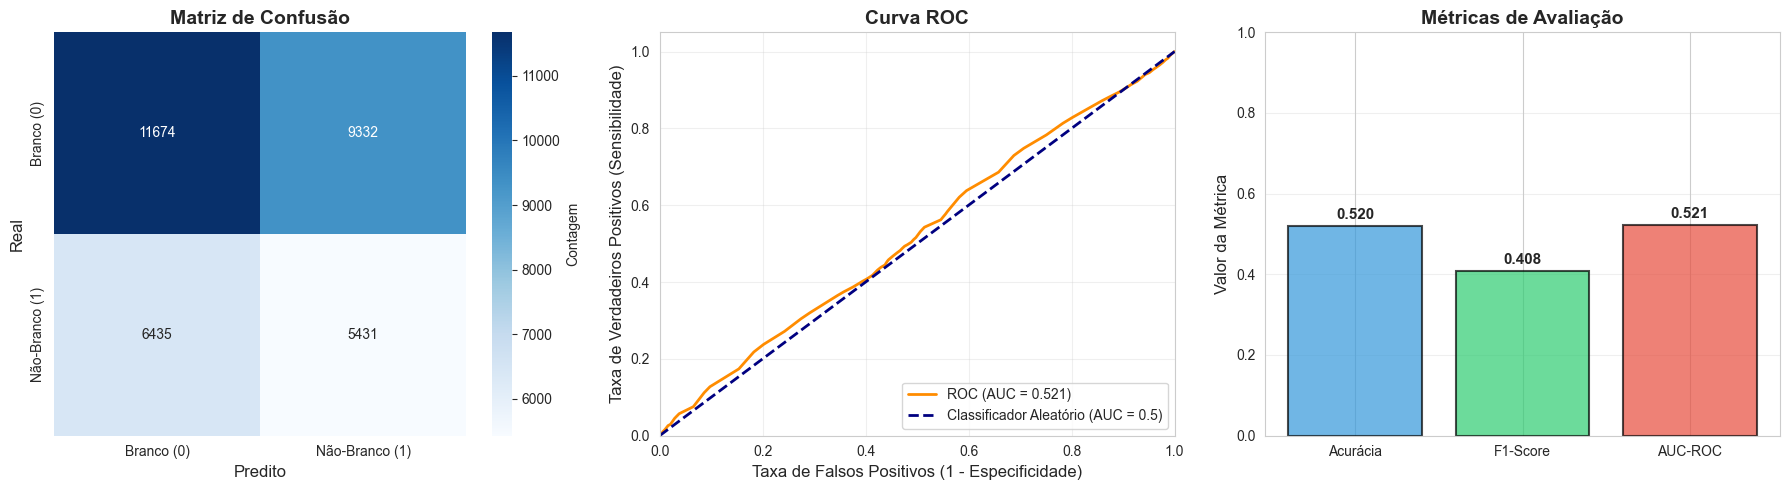


✅ Visualizações geradas com sucesso!


In [54]:
# VISUALIZAÇÕES DAS MÉTRICAS
# ===========================

# Configuração de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 5)

# Criar figura com 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. MATRIZ DE CONFUSÃO (visual)
ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Branco (0)', 'Não-Branco (1)'],
            yticklabels=['Branco (0)', 'Não-Branco (1)'],
            ax=ax1, cbar_kws={'label': 'Contagem'})
ax1.set_title('Matriz de Confusão', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predito', fontsize=12)
ax1.set_ylabel('Real', fontsize=12)

# 2. CURVA ROC
ax2 = axes[1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
ax2.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC (AUC = {auc_roc:.3f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Classificador Aleatório (AUC = 0.5)')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Taxa de Falsos Positivos (1 - Especificidade)', fontsize=12)
ax2.set_ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)', fontsize=12)
ax2.set_title('Curva ROC', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right", fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. MÉTRICAS RESUMIDAS
ax3 = axes[2]
metricas = ['Acurácia', 'F1-Score', 'AUC-ROC']
valores = [acuracia, f1, auc_roc]
cores = ['#3498db', '#2ecc71', '#e74c3c']
bars = ax3.bar(metricas, valores, color=cores, alpha=0.7, edgecolor='black', linewidth=1.5)
ax3.set_ylim([0, 1])
ax3.set_ylabel('Valor da Métrica', fontsize=12)
ax3.set_title('Métricas de Avaliação', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for bar, valor in zip(bars, valores):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{valor:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualizações geradas com sucesso!")


## Análise dos Resultados e Interpretação


In [55]:
# ANÁLISE DOS RESULTADOS
# ======================

print("=" * 70)
print("ANÁLISE DOS RESULTADOS DO MODELO")
print("=" * 70)
print()

# 1. ANÁLISE DE PERFORMANCE
print("1️⃣ ANÁLISE DE PERFORMANCE DO MODELO")
print("-" * 70)
print(f"   • Acurácia: {acuracia:.2%}")
print(f"     → O modelo classifica corretamente {acuracia:.2%} dos casos.")
print(f"     → Considerando o desbalanceamento (63.9% brancos vs 36.1% não-brancos),")
print(f"       uma acurácia de {acuracia:.2%} está próxima do baseline (63.9%),")
print(f"       indicando que o modelo tem dificuldade em superar a classe majoritária.")
print()
print(f"   • F1-Score: {f1:.3f}")
print(f"     → Balanceia precisão e recall, sendo útil para classes desbalanceadas.")
print(f"     → Um F1-Score de {f1:.3f} indica performance moderada.")
print()
print(f"   • AUC-ROC: {auc_roc:.3f}")
print(f"     → Mede a capacidade do modelo de distinguir entre as classes.")
print(f"     → AUC > 0.5 indica que o modelo é melhor que aleatório.")
print(f"     → Um valor de {auc_roc:.3f} sugere capacidade discriminativa moderada.")
print()

# 2. ANÁLISE DO DESBALANCEAMENTO
print("2️⃣ ANÁLISE DO DESBALANCEAMENTO")
print("-" * 70)
distribuicao = df_modelo["nao_branco"].value_counts(normalize=True)
print(f"   • Distribuição da variável alvo:")
print(f"     - Branco (0): {distribuicao[0.0]:.2%}")
print(f"     - Não-Branco (1): {distribuicao[1.0]:.2%}")
print(f"   • Razão de desbalanceamento: {distribuicao[0.0]/distribuicao[1.0]:.2f}:1")
print(f"   • Há um desbalanceamento moderado (aproximadamente 1.77:1).")
print(f"   • O uso de 'class_weight=balanced' ajuda a compensar esse desbalanceamento.")
print()

# 3. ANÁLISE DA MATRIZ DE CONFUSÃO
print("3️⃣ INTERPRETAÇÃO DA MATRIZ DE CONFUSÃO")
print("-" * 70)
tn, fp, fn, tp = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
sensibilidade = tp / (tp + fn) if (tp + fn) > 0 else 0
especificidade = tn / (tn + fp) if (tn + fp) > 0 else 0
precisao = tp / (tp + fp) if (tp + fp) > 0 else 0

print(f"   • Sensibilidade (Recall - Classe Não-Branco): {sensibilidade:.2%}")
print(f"     → Dos casos realmente não-brancos, {sensibilidade:.2%} foram identificados corretamente.")
print()
print(f"   • Especificidade (Classe Branco): {especificidade:.2%}")
print(f"     → Dos casos realmente brancos, {especificidade:.2%} foram identificados corretamente.")
print()
print(f"   • Precisão (Classe Não-Branco): {precisao:.2%}")
print(f"     → Dos casos previstos como não-brancos, {precisao:.2%} são realmente não-brancos.")
print()
print(f"   • Observação: O modelo tem mais dificuldade em identificar corretamente")
print(f"     a classe minoritária (não-branco), o que é comum em dados desbalanceados.")
print()

# 4. IMPORTÂNCIA DAS VARIÁVEIS
print("4️⃣ IMPORTÂNCIA DAS VARIÁVEIS")
print("-" * 70)
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': log_reg.coef_[0]
})
coeficientes['Abs_Coeficiente'] = np.abs(coeficientes['Coeficiente'])
coeficientes = coeficientes.sort_values('Abs_Coeficiente', ascending=False)

print("   Coeficientes da Regressão Logística (ordenados por importância):")
print()
for idx, row in coeficientes.iterrows():
    sinal = "+" if row['Coeficiente'] > 0 else "-"
    print(f"   {sinal} {row['Variável']:20s}: {row['Coeficiente']:7.4f}")
print()
print("   Interpretação:")
print("   • Coeficientes positivos aumentam a probabilidade de ser não-branco.")
print("   • Coeficientes negativos diminuem a probabilidade de ser não-branco.")
print("   • Valores absolutos maiores indicam maior influência na predição.")
print()

# 5. AJUSTES FUTUROS
print("5️⃣ AJUSTES SUGERIDOS PARA MELHORAR O MODELO")
print("-" * 70)
print("   • Testar outros algoritmos:")
print("     - Árvores de Decisão (melhor interpretabilidade)")
print("     - Random Forest (pode capturar interações não-lineares)")
print("     - kNN (pode ser útil para padrões locais)")
print()
print("   • Engenharia de features:")
print("     - Criar interações entre variáveis (ex: sexo × região)")
print("     - Adicionar variáveis temporais (sazonalidade)")
print("     - Considerar variáveis geográficas adicionais")
print()
print("   • Tratamento de desbalanceamento:")
print("     - Testar SMOTE (oversampling da classe minoritária)")
print("     - Ajustar threshold de classificação")
print("     - Usar métricas específicas (F1, AUC-ROC) como critério de otimização")
print()
print("   • Validação cruzada:")
print("     - Implementar k-fold cross-validation para avaliação mais robusta")
print("     - Tuning de hiperparâmetros (GridSearchCV)")
print()

print("=" * 70)



ANÁLISE DOS RESULTADOS DO MODELO

1️⃣ ANÁLISE DE PERFORMANCE DO MODELO
----------------------------------------------------------------------
   • Acurácia: 52.04%
     → O modelo classifica corretamente 52.04% dos casos.
     → Considerando o desbalanceamento (63.9% brancos vs 36.1% não-brancos),
       uma acurácia de 52.04% está próxima do baseline (63.9%),
       indicando que o modelo tem dificuldade em superar a classe majoritária.

   • F1-Score: 0.408
     → Balanceia precisão e recall, sendo útil para classes desbalanceadas.
     → Um F1-Score de 0.408 indica performance moderada.

   • AUC-ROC: 0.521
     → Mede a capacidade do modelo de distinguir entre as classes.
     → AUC > 0.5 indica que o modelo é melhor que aleatório.
     → Um valor de 0.521 sugere capacidade discriminativa moderada.

2️⃣ ANÁLISE DO DESBALANCEAMENTO
----------------------------------------------------------------------
   • Distribuição da variável alvo:
     - Branco (0): 63.90%
     - Não-Branco (1

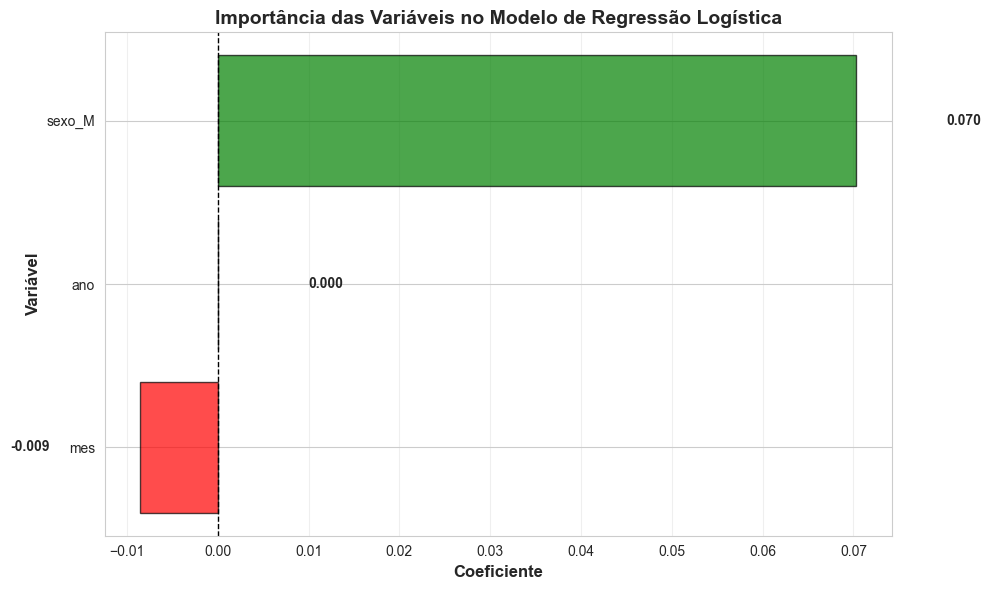

✅ Gráfico de importância das variáveis gerado!


In [56]:
# VISUALIZAÇÃO DA IMPORTÂNCIA DAS VARIÁVEIS
# =========================================

plt.figure(figsize=(10, 6))
coeficientes_ordenados = coeficientes.sort_values('Coeficiente', ascending=True)
cores = ['red' if x < 0 else 'green' for x in coeficientes_ordenados['Coeficiente']]

bars = plt.barh(coeficientes_ordenados['Variável'], 
                coeficientes_ordenados['Coeficiente'],
                color=cores, alpha=0.7, edgecolor='black', linewidth=1)

plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Coeficiente', fontsize=12, fontweight='bold')
plt.ylabel('Variável', fontsize=12, fontweight='bold')
plt.title('Importância das Variáveis no Modelo de Regressão Logística', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

for bar, valor in zip(bars, coeficientes_ordenados['Coeficiente']):
    width = bar.get_width()
    plt.text(width + (0.01 if width > 0 else -0.01), bar.get_y() + bar.get_height()/2,
             f'{valor:.3f}', ha='left' if width > 0 else 'right', 
             va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Gráfico de importância das variáveis gerado!")
